In [1]:
import nltk

nltk.download("punkt", quiet=True)
import re, pprint
from nltk import word_tokenize

# Tokenizing words - warm up 

Futher reading Chatper 3, Section ["3.7 Regular Expressions for Tokenizing Text"](https://www.nltk.org/book/ch03.html#:~:text=3.7%C2%A0%C2%A0%C2%A0Regular%20Expressions%20for%20Tokenizing%20Text)

More regular expression symbols are used for your reference.

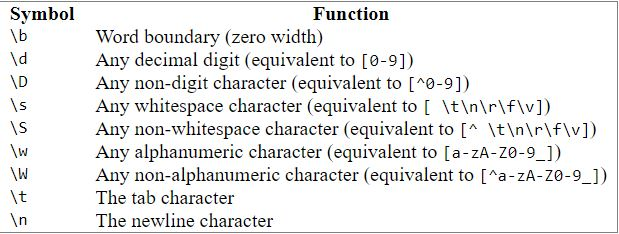

## *Simple Approaches to Tokenization*

The very simplest method for tokenizing text is to split on whitespace. Consider the following text from Alice's Adventures in Wonderland:

In [2]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
... though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
... well without--Maybe it's always pepper that makes people hot-tempered,'..."""
print(re.split(r" ", raw), "\n")
print(re.split(r"[ \t\n]+", raw), "\n")
print(re.findall(r"\w+|\S\w*", raw), "\n")
print(re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw), "\n")
text = "That U.S.A. poster-print costs $12.40..."
pattern = r"""(?x)     # set flag to allow verbose regexps
    (?:[A-Z]\.)+       # abbreviations, e.g. U.S.A.
    | \w+(?:-\w+)*       # words with optional internal hyphens
    | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
    | \.\.\.             # ellipsis
    | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
    """

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone\nthough),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very\nwell', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."] 

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."] 

["'When", 'I', "'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'I", 'won', "'t", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '-', '-Maybe', 'it', "'s", 'always', 'pepper', 'that', 'makes', 

Why there are different results? Which is the best?

Your notes: Different results as the first splits all words with a singular whitespace, so every character is tokenized when there is exactly one space between them, so a lot of errors are kept.
Second splits the same way, but on any number of spaces, tabs or newlines so it excludes the new line break that comes through from the first split.
Third is a findall a character(1 or more) or a whitespace character followed by a character (1 or more). This does not include punctuation so I'M splits into I and M, whilst -Maybe is by itself rather than the with--Maybe in the first 2.
Last is the best and it finds only a character(1 or more), then excludes any and all ? to - or ' characters inbetween words

In [13]:
# your turn to explore
print(re.findall(r"\w+(?:-\w+)*", text),  "\n")

['That', 'U', 'S', 'A', 'poster-print', 'costs', '12', '40'] 



## *NLTK's Regular Expression Tokenizer*

This is NLTK's Regular Expression Tokenizer

In [16]:
text = "That U.S.A. poster-print costs $12.40..."
pattern = r"""(?x)     # set flag to allow verbose regexps
    (?:[A-Z]\.)+       # abbreviations, e.g. U.S.A.
    | \w+(?:-\w+)*       # words with optional internal hyphens
    | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
    | \.\.\.             # ellipsis
    | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
    """
print(nltk.regexp_tokenize(text, pattern), "\n")

['That', 'U.S.A.', 'poster-print', 'costs', '$12.40', '...'] 



Your notes: Works well! but below example f first text shows that it doesnt work that well, making our own tokenizer is more effective

In [17]:
# Your turn: try another sentence?
text = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
... though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
... well without--Maybe it's always pepper that makes people hot-tempered,'..."""
pattern = r"""(?x)     # set flag to allow verbose regexps
    (?:[A-Z]\.)+       # abbreviations, e.g. U.S.A.
    | \w+(?:-\w+)*       # words with optional internal hyphens
    | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
    | \.\.\.             # ellipsis
    | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
    """
print(nltk.regexp_tokenize(text, pattern), "\n")

["'", 'When', 'I', "'", 'M', 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(', 'not', 'in', 'a', 'very', 'hopeful', 'tone', '...', 'though', ')', ',', "'", 'I', 'won', "'", 't', 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', '...', 'well', 'without', 'Maybe', 'it', "'", 's', 'always', 'pepper', 'that', 'makes', 'people', 'hot-tempered', ',', "'", '...'] 



# Tokenizing words - questions

### **Question 1: Tokenizing Archaic Contractions**

Given the text:

"Thou'rt the bravest knight in all the land, and o'er the hills we ride. 'Tis the fate of those who dost dare, yet ne'er shall we falter. E'en when darkness falls, ha' we not the courage?"

Aa naive regular expression like in the code bellow `\w+` does not correctly capture Arabic words or other scripts because `\w` only matches Latin letters, digits, and underscores. Edit the code bellow to use a regular expression correctly identifies archaic contractions such as "thou'rt", "o'er", "e'en", "ne'er", "ha'", "'tis", and "'twas" as single tokens while treating other words normally. 

In [ ]:
import nltk

text = """Thou'rt the bravest knight in all the land, and o'er the hills we ride. 
'Tis the fate of those who dost dare, yet ne'er shall we falter. 
E'en when darkness falls, ha' we not the courage?"""
pattern = r"""(?x)
    \w+# words with optional internal '
"""
tokens = nltk.regexp_tokenize(text, pattern)
print(tokens)

### Question 2: Handling Multiword Expressions (MWE) with Period Characters  
Multiword expressions (MWEs) such as `"New York"`, `"rock 'n' roll"`, `"Dr. Smith"`, `"U.S.A."`, `"St. Patrick"`, and `"E.U. regulations"` should be treated as single tokens instead of being split. Use the `MWETokenizer` from NLTK ([documentation](https://www.nltk.org/_modules/nltk/tokenize/mwe.html)) to tokenize a sample sentence that contains these MWEs. Define the tokenizer using `mwe_list = [("New", "York"), ("rock", "'n'", "roll"), ("Dr.", "Smith"), ("U.S.A."), ("St.", "Patrick"), ("E.U.", "regulations")]`, ensuring that the tokenizer correctly recognizes them as single units and print the tokenized output.


## **Question 3: Calculating Vocabulary Size for 10,000 Words and Comparing with Heaps' Law**  

Heaps' Law states that vocabulary size ($|V|$) grows sub-linearly with the total number of words ($N$), following the equation:  

$
|V| = kN^\beta
$

where **$k = 30$** and **$\beta = 0.5$**, which are appropriate values for the **Brown Corpus**. Using the **Brown Corpus** from NLTK, compute the **vocabulary size for the first 10,000 words** and compare it with the expected vocabulary size using Heaps’ Law. Print both the actual and expected vocabulary sizes.  

**Expected Output**

```plaintext
Total words sampled: 10000
Actual vocabulary size: NUMBER
Expected vocabulary size (Heaps' Law): NUMBER
```

(Optional) For further exploration, you may also compute the vocabulary size for **5,000**, **20,000**, and **50,000** words to observe how vocabulary growth changes with text size and do a plot.  


# Normalizing words - warm up

Futher reading Chatper 3, Section ["3.6 Normalizing Text"](https://www.nltk.org/book/ch03.html#:~:text=3.6%C2%A0%C2%A0%C2%A0Normalizing%20Text)

First, we need to define the data we will use in this section.

In [ ]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
    is no basis for a system of government. Supreme executive power derives from
    a mandate from the masses, not from some farcical aquatic ceremony."""

In [ ]:
tokens = word_tokenize(raw)

In [ ]:
print(raw, "\n")
print(tokens, "\n")

In [ ]:
# You turn: change   to another sentence and try the above.
# What is the difference between raw and tokens?

**You notes here**
......

## *Stemmers*

NLTK includes several off-the-shelf stemmer.  The Porter and Lancaster stemmers follow their own rules for stripping affixes. Observe that the Porter stemmer correctly handles the word lying (mapping it to lie), while the Lancaster stemmer does not.

Stemming is not a well-defined process, and we typically pick the stemmer that best suits the application we have in mind.

In [ ]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
[porter.stem(t) for t in tokens]

In [ ]:
[lancaster.stem(t) for t in tokens]

In [ ]:
# your turn

Can you notice the difference of two methods?

**Your notes**
......

## *Lemmatization*

The WordNet lemmatizer is a good choice if you want to compile the vocabulary of some texts and want a list of valid lemmas (or lexicon headwords).

In [ ]:
wnl = nltk.WordNetLemmatizer()
print([wnl.lemmatize(t) for t in tokens], "\n")

In [ ]:
# your turn try change tokens for and sentence here

What is difference between lemmatization and stemming?

**Your notes here:**
......

# Normalizing words - questions

### Question 4: Compare a Regex-Based Stemmer and the Porter Stemmer  
Stemming reduces words to their root form, but different approaches can yield varying results. Implement a regex-based stemmer that removes common suffixes and compare its output with the Porter Stemmer from NLTK. Apply both stemmers to the list of words `["running", "happiness", "nationalization", "quickly", "arguing", "playfulness", "defensible"]`


**Expected Output**

```plaintext
Regex Stemmer: [...]
Porter Stemmer: [...]
```

### **Question 5: Compare Lemmatization and Stemming with PorterStemmer**  

Use NLTK’s `WordNetLemmatizer` with the **pos parameter set to `"a"`** to lemmatize the list of words `["running", "better", "flies", "mice", "jumped", "houses", "arguments", "singing"]`, and compare the results with the Porter Stemmer. Print both the original and processed words.  

---

### **Expected Output**
```plaintext
Porter Stemmer: []
Lemmatized (pos='a'): [...]
```

(Optional): After obtaining the results, compare them with different **pos values** in the `lemmatize` function to observe how they affect the output.

# Segmenting sentences - warm up

Futher reading Chatper 3, Section ["3.8 Segmentation"](https://www.nltk.org/book/ch03.html#:~:text=3.8%C2%A0%C2%A0%C2%A0Segmentation)


## *Sentence Segmentation*

In [ ]:
len(nltk.corpus.brown.words()) / len(nltk.corpus.brown.sents())

In [ ]:
text = nltk.corpus.gutenberg.raw("chesterton-thursday.txt")
sents = nltk.sent_tokenize(text)
pprint.pprint(sents[79:89])

How is the sentence segmentation maybe based on?

Your notes:

In [ ]:
# Your turn: Change to another section of the text and explore

# Segmenting sentences - questions

### **Question 6: Comparing Sentence Tokenization with Punkt and Naive Splitting**  

Compare **NLTK’s `sent_tokenize()` function** with a **Naive approach** that splits sentences using **periods (`.`), exclamation marks (`!`), and question marks (`?`)**. Using the `nltk.corpus.gutenberg.raw('austen-emma.txt')`,  segment the text into sentences using both methods. Then, compute and print the **total number of sentences** detected by each method, the **average number of words per sentence**, and the **first 5 sentences** from both approaches to compare their accuracy.  

---

### **Expected Output**
```plaintext
Naive Sentence Count: NUMBER
Average Words per Sentence (Naive): NUMBER

First 5 sentences using Naive Split:
- ...
- ...
- ...
- ...
- ...

Punkt Sentence Count: NUMBER
Average Words per Sentence (Punkt): NUMBER

First 5 sentences using Punkt:
- ...
- ...
- ...
- ...
- ...
```


### Question 7: Comparing with `sent_tokenize()` and PunktSentenceTokenizer

NLTK’s `sent_tokenize()` function uses a pre-trained **Punkt sentence tokenizer** to segment text into sentences, but its accuracy may vary across different corpora. Apply `sent_tokenize()` to a corpus (e.g., `gutenberg.raw('austen-emma.txt')`), then train a `PunktSentenceTokenizer` on the same corpus and use it for sentence tokenization. Finally, compare the results by printing the **first 5 sentences from each method** and the **total number of sentences detected**.  

**Expected Output Format:**  
```plaintext
Default sent_tokenize output (first 5 sentences): [...]
Trained Punkt tokenizer output (first 5 sentences): [...]
Total sentences detected by sent_tokenize(): NUMBER
Total sentences detected by trained Punkt tokenizer: NUMBER
```